<a href="https://colab.research.google.com/github/khushisachdev/trade-assignment/blob/master/spotify_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arshmankhalid/shopify-streaming-history-dataset")

print("Path to dataset files:", path)

100%|██████████| 6.09M/6.09M [00:00<00:00, 59.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/arshmankhalid/shopify-streaming-history-dataset/versions/1


In [4]:
from google.colab import files
uploaded = files.upload()  # This will open a file upload dialog




Saving high_popularity_spotify_data.csv to high_popularity_spotify_data.csv


In [6]:
import pandas as pd

# Load the High Popularity Excel file
df = pd.read_csv("high_popularity_spotify_data.csv")  # Adjust the filename if needed

# Display the first few rows
df.head()


,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,...,instrumentalness,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id
0,0.592,157.969,0.521,pop,-7.777,0.122,0.535,"Lady Gaga, Bruno Mars",3,0.0304,...,0.0000,10FLjwfpbxLmW8c25Xyc2N,0,6,251668,0.3080,2plbrEY59IikOBgBGLjaoe,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
1,0.507,104.978,0.747,pop,-10.171,0.117,0.438,Billie Eilish,4,0.0358,...,0.0608,7aJuG4TFXa2hmE4z1yxc3n,1,2,210373,0.2000,6dOtVTDdiauQNBQEDOtlAB,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
2,0.808,108.548,0.554,pop,-4.169,0.159,0.372,Gracie Abrams,4,0.0368,...,0.0000,0hBRqPYPXhr1RkTDG3n4Mk,1,1,166300,0.2140,7ne4VBA60CxGM75vw0EYad,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
3,0.910,112.966,0.670,pop,-4.070,0.304,0.786,Sabrina Carpenter,4,0.0634,...,0.0000,4B4Elma4nNDUyl6D5PvQkj,0,0,157280,0.0939,1d7Ptw3qYcfpdLNL5REhtJ,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
4,0.783,149.027,0.777,pop,-4.477,0.355,0.939,"ROSÉ, Bruno Mars",4,0.2600,...,0.0000,2IYQwwgxgOIn7t3iF6ufFD,0,0,169917,0.0283,5vNRhkKd0yEAg8suGBpjeY,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M


In [8]:
# Count the number of columns
num_columns = df.shape[1]

print("Number of columns:",num_columns)


Number of columns: 29


In [9]:
print(df.columns)


Index(['energy', 'tempo', 'danceability', 'playlist_genre', 'loudness',
       'liveness', 'valence', 'track_artist', 'time_signature', 'speechiness',
       'track_popularity', 'track_href', 'uri', 'track_album_name',
       'playlist_name', 'analysis_url', 'track_id', 'track_name',
       'track_album_release_date', 'instrumentalness', 'track_album_id',
       'mode', 'key', 'duration_ms', 'acousticness', 'id', 'playlist_subgenre',
       'type', 'playlist_id'],
      dtype='object')


In [14]:
print(df.isnull().sum())


energy                       0
tempo                        0
danceability                 0
playlist_genre               0
loudness                     0
liveness                     0
valence                      0
track_artist                 0
time_signature               0
speechiness                  0
track_popularity             0
track_href                   0
uri                          0
track_album_name             1
playlist_name                0
analysis_url                 0
track_id                     0
track_name                   0
track_album_release_date    81
instrumentalness             0
track_album_id               0
mode                         0
key                          0
duration_ms                  0
acousticness                 0
id                           0
playlist_subgenre            0
type                         0
playlist_id                  0
dtype: int64


In [11]:
print(df.describe())


            energy        tempo  danceability     loudness     liveness  \
count  1686.000000  1686.000000   1686.000000  1686.000000  1686.000000   
mean      0.667216   121.070938      0.650362    -6.704131     0.171579   
std       0.184908    27.066029      0.157721     3.377068     0.123953   
min       0.001610    49.305000      0.136000   -43.643000     0.021000   
25%       0.551000   100.058750      0.543250    -7.950250     0.093400   
50%       0.689000   120.001000      0.664500    -5.974500     0.121000   
75%       0.807000   136.833500      0.769000    -4.687250     0.210000   
max       0.990000   209.688000      0.979000     1.295000     0.950000   

           valence  time_signature  speechiness  track_popularity  \
count  1686.000000     1686.000000  1686.000000       1686.000000   
mean      0.525737        3.950178     0.100926         75.806050   
std       0.236113        0.326673     0.099748          6.032532   
min       0.034800        1.000000     0.023200 

In [15]:
df = df.dropna(subset=['track_name'])


In [16]:
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'], errors='coerce')
most_common_date = df['track_album_release_date'].mode()[0]
df['track_album_release_date'].fillna(most_common_date, inplace=True)


<ipython-input-16-6c902990dcf2>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['track_album_release_date'].fillna(most_common_date, inplace=True)


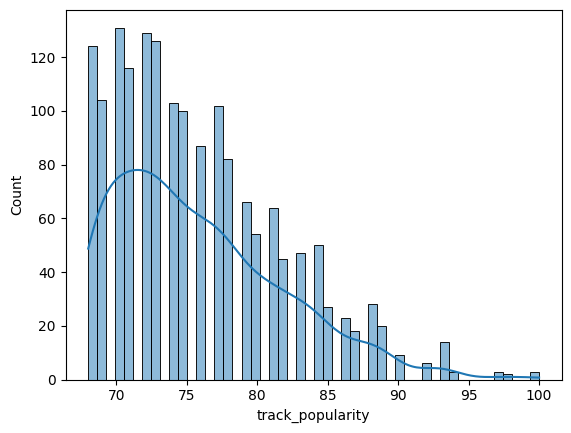

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['track_popularity'], bins=50, kde=True)
plt.show()
